In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier, Pool

In [1]:
df_train = pd.read_csv("C:/Users/Роман/Downloads/application_train.csv")

NameError: name 'pd' is not defined

## Learning data

In [3]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
cat_cols = df_train.select_dtypes(include=['object', 'string']).columns
cat_cols
#num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
#num_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [5]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
num_cols


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [6]:
df_train["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [7]:
df_train["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [8]:
pd.crosstab(df_train['TARGET'],df_train["CNT_CHILDREN"])

CNT_CHILDREN,0,1,2,3,4,5,6,7,8,9,10,11,12,14,19
TARGET,,,,,,,,,,,,,,,
0,198762,55665,24416,3359,374,77,15,7,2,0,2,0,2,3,2
1,16609,5454,2333,358,55,7,6,0,0,2,0,1,0,0,0


In [9]:
df_train['TARGET'].groupby(df_train["CNT_CHILDREN"]).mean()[:5]

CNT_CHILDREN
0    0.077118
1    0.089236
2    0.087218
3    0.096314
4    0.128205
Name: TARGET, dtype: float64

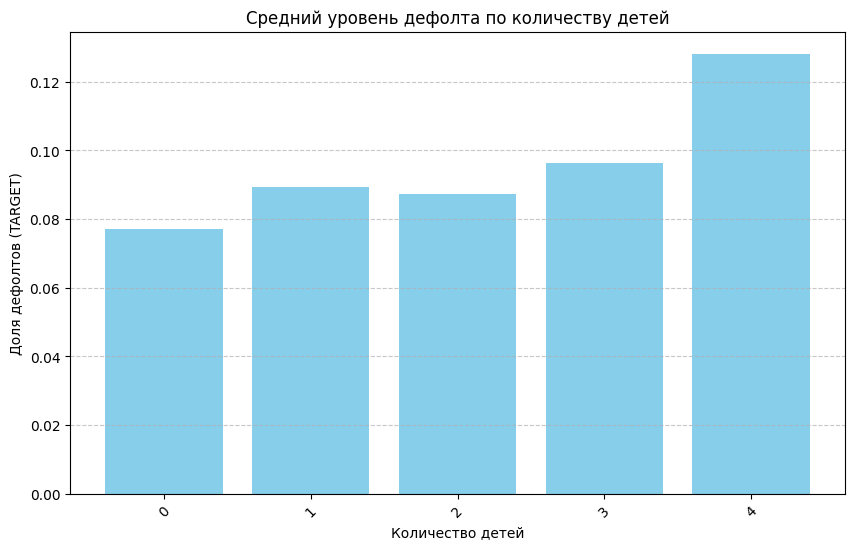

In [10]:
count_children_target = df_train['TARGET'].groupby(df_train["CNT_CHILDREN"]).mean()[:5].reset_index()
count_children_target.columns = ['Children_number', 'Default_Rate']

plt.figure(figsize=(10, 6))
plt.bar(count_children_target['Children_number'], count_children_target['Default_Rate'], color='skyblue')
plt.title('Средний уровень дефолта по количеству детей')
plt.xlabel('Количество детей')
plt.ylabel('Доля дефолтов (TARGET)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df_train['TARGET'].groupby(df_train["NAME_EDUCATION_TYPE"]).mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64

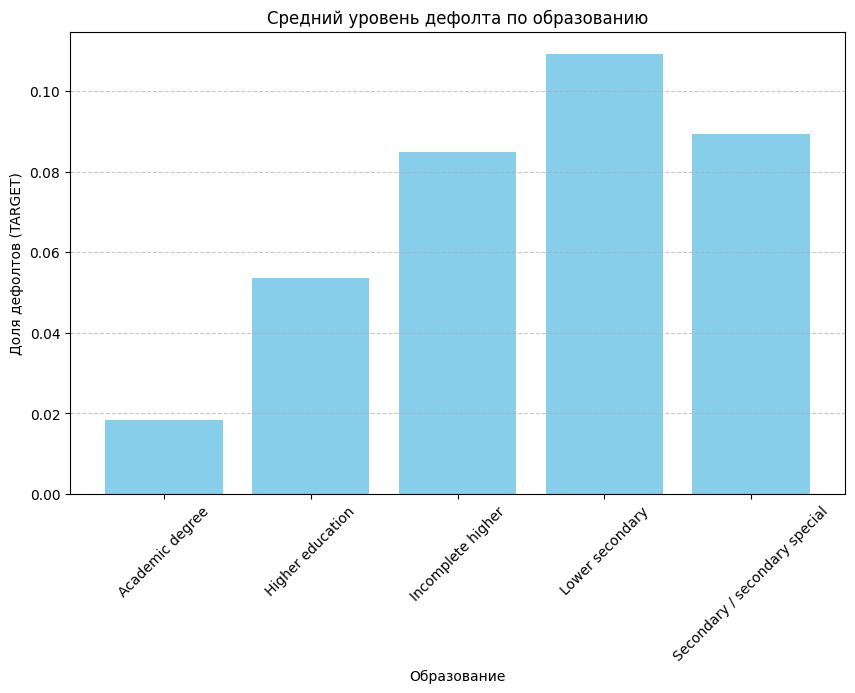

In [12]:
education_target = df_train['TARGET'].groupby(df_train["NAME_EDUCATION_TYPE"]).mean().reset_index()
education_target.columns = ['Education', 'Default_Rate']

plt.figure(figsize=(10, 6))
plt.bar(education_target['Education'], education_target['Default_Rate'], color='skyblue')
plt.title('Средний уровень дефолта по образованию')
plt.xlabel('Образование')
plt.ylabel('Доля дефолтов (TARGET)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
df_train['TARGET'].groupby(df_train["WEEKDAY_APPR_PROCESS_START"]).mean()

WEEKDAY_APPR_PROCESS_START
FRIDAY       0.081469
MONDAY       0.077572
SATURDAY     0.078873
SUNDAY       0.079291
THURSDAY     0.081003
TUESDAY      0.083505
WEDNESDAY    0.081604
Name: TARGET, dtype: float64

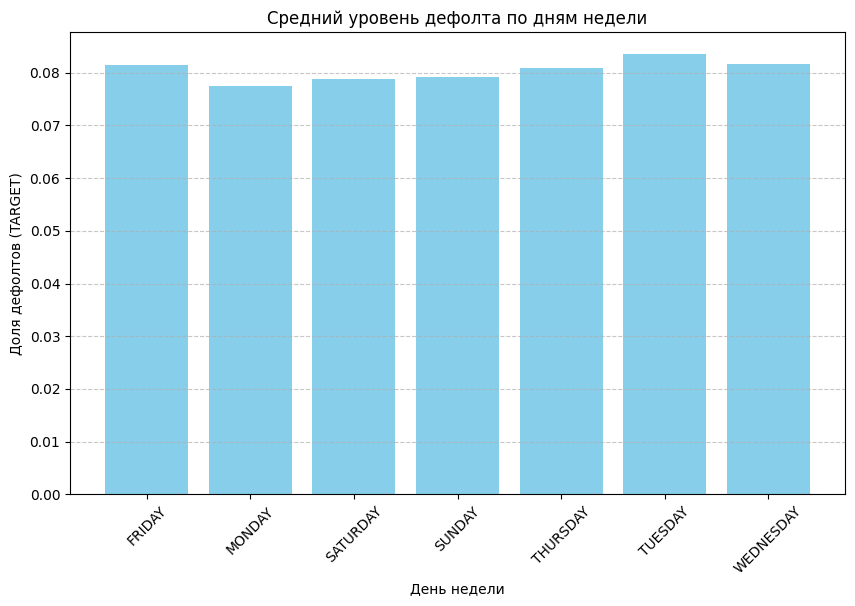

In [14]:
weekday_target = df_train['TARGET'].groupby(df_train["WEEKDAY_APPR_PROCESS_START"]).mean().reset_index()
weekday_target.columns = ['Weekday', 'Default_Rate']

plt.figure(figsize=(10, 6))
plt.bar(weekday_target['Weekday'], weekday_target['Default_Rate'], color='skyblue')
plt.title('Средний уровень дефолта по дням недели')
plt.xlabel('День недели')
plt.ylabel('Доля дефолтов (TARGET)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
df_train['TARGET'].groupby(df_train["NAME_FAMILY_STATUS"]).mean()

NAME_FAMILY_STATUS
Civil marriage          0.099446
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Unknown                 0.000000
Widow                   0.058242
Name: TARGET, dtype: float64

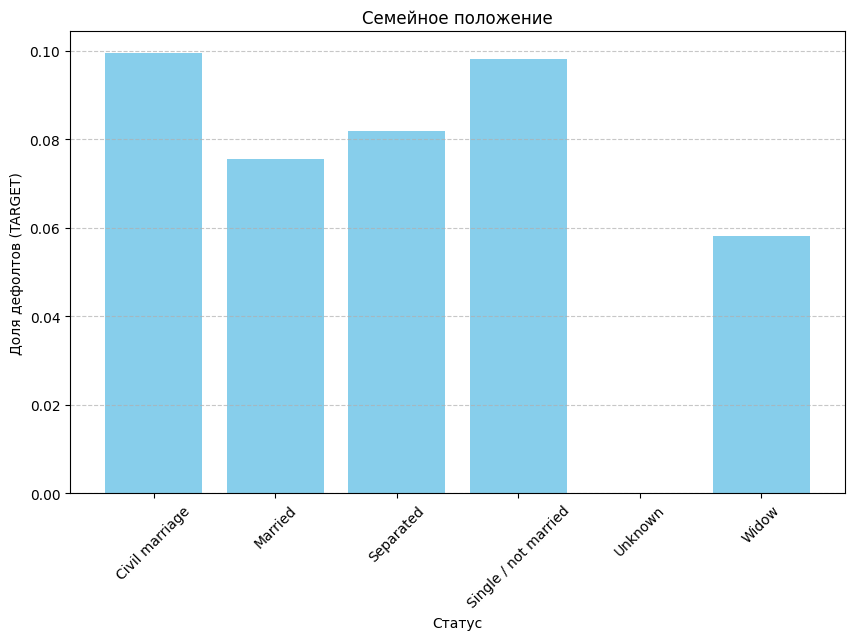

In [16]:
mariage_target = df_train['TARGET'].groupby(df_train["NAME_FAMILY_STATUS"]).mean().reset_index()
mariage_target.columns = ['Family_status', 'Default_Rate']

plt.figure(figsize=(10, 6))
plt.bar(mariage_target['Family_status'], mariage_target['Default_Rate'], color='skyblue')
plt.title('Семейное положение')
plt.xlabel('Статус')
plt.ylabel('Доля дефолтов (TARGET)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Preparing data

In [17]:
df_train.loc[:, num_cols] = df_train[num_cols].fillna(0)
#df_train.loc[:, cat_cols] = df_train[cat_cols].fillna(0)
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print(df_train[cat_cols].agg(['nunique', 'unique']).T)

                           nunique  \
NAME_CONTRACT_TYPE               2   
CODE_GENDER                      3   
FLAG_OWN_CAR                     2   
FLAG_OWN_REALTY                  2   
NAME_TYPE_SUITE                  7   
NAME_INCOME_TYPE                 8   
NAME_EDUCATION_TYPE              5   
NAME_FAMILY_STATUS               6   
NAME_HOUSING_TYPE                6   
OCCUPATION_TYPE                 18   
WEEKDAY_APPR_PROCESS_START       7   
ORGANIZATION_TYPE               58   
FONDKAPREMONT_MODE               4   
HOUSETYPE_MODE                   3   
WALLSMATERIAL_MODE               7   
EMERGENCYSTATE_MODE              2   

                                                                       unique  
NAME_CONTRACT_TYPE                              [Cash loans, Revolving loans]  
CODE_GENDER                                                       [M, F, XNA]  
FLAG_OWN_CAR                                                           [N, Y]  
FLAG_OWN_REALTY                  

In [19]:
df_train = df_train[df_train["CODE_GENDER"] != 'XNA']
df_train = df_train[df_train["NAME_FAMILY_STATUS"] != 'Unknown']
#df_train.drop(columns='ORGANIZATION_TYPE', inplace=True)

In [20]:
cat_cols = df_train.select_dtypes(include=['object', 'string']).columns
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
df_train[cat_cols]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


## Training model (raw way)

In [21]:
"""
В этом подходе были просто заведены дамми-переменные под категориальные признаки
"""

'\nВ этом подходе были просто заведены дамми-переменные под категориальные признаки\n'

In [64]:
for col in df_train[cat_cols]:
    if df_train[col].nunique() == 2:
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
        
df_train = pd.get_dummies(df_train, columns=[col for col in cat_cols if df_train[col].nunique() > 2],dtype=int)

In [65]:
X = df_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42  
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model0 = LogisticRegression(
    penalty='l2', 
    C=1.0, 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42)

model0.fit(X_train_scaled, y_train)

y_proba_train = model0.predict_proba(X_train_scaled)[:, 1]
y_proba_test = model0.predict_proba(X_test_scaled)[:, 1]  
roc_auc_train = roc_auc_score(y_train, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)
print(f"ROC-AUC test: {roc_auc_test:.4f}")

#ROC-AUC test: 0.7275

ROC-AUC test: 0.7275
ROC-AUC train: 0.7329


## Training model with education-family_status hypothesis

In [ ]:
"""
В этом подходе на основе eda признаки семейного положения и образования были пронумерованы в порядке доли дефолтов в них
"""

In [95]:
education_order = ['Lower secondary','Secondary / secondary special','Incomplete higher', 'Higher education', 'Academic degree']
df_train["NAME_EDUCATION_TYPE"] = df_train["NAME_EDUCATION_TYPE"].map(
    {v: i for i, v in enumerate(education_order)}
)

family_order = ['Civil marriage','Single / not married','Separated', 'Married', 'Widow']
df_train["NAME_FAMILY_STATUS"] = df_train["NAME_FAMILY_STATUS"].map(
    {v: i for i, v in enumerate(family_order)}
)


In [96]:
for col in df_train[cat_cols]:
    if df_train[col].nunique() == 2:
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
        
df_train = pd.get_dummies(df_train, columns=[col for col in cat_cols if df_train[col].nunique() > 2],dtype=int)

In [97]:
X = df_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42  
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model0 = LogisticRegression(
    penalty='l2', 
    C=1.0, 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42)

model0.fit(X_train_scaled, y_train)

y_proba_train = model0.predict_proba(X_train_scaled)[:, 1]
y_proba_test = model0.predict_proba(X_test_scaled)[:, 1]  
roc_auc_train = roc_auc_score(y_train, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)
print(f"ROC-AUC test: {roc_auc_test:.4f}")

#ROC-AUC test: 0.7275
#ROC-AUC lift is 0

ROC-AUC test: 0.7275
ROC-AUC train: 0.7329


In [ ]:
"""
В силу ничтожности доли этих столбцов в общем числе гипотеза не привела к результату
"""

## Training model with target encoding on categorial features

In [ ]:
"""
Применяется таргет энкодинг как способ обработки категориальных фичей, для nan использовали замещение средним
"""

In [152]:
X = df_train.drop(columns=['SK_ID_CURR'])
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42  
)

In [153]:
def target_encode(df, cat_cols, target_col='TARGET'):
    df_encoded = df.copy()
    for col in cat_cols:
        encoding_map = df.groupby(col)[target_col].mean().to_dict()
        df_encoded[col] = df[col].map(encoding_map)
    return df_encoded

X_train_encoded = target_encode(X_train, cat_cols)
X_test_encoded = target_encode(X_test, cat_cols)

In [155]:
X_train = X_train_encoded.drop(columns=['TARGET'])
X_test = X_test_encoded.drop(columns=['TARGET'])
y_train = X_train_encoded['TARGET']

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model0 = LogisticRegression(
    penalty='l2', 
    C=1.0, 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42)

model0.fit(X_train_scaled, y_train)

y_proba_train = model0.predict_proba(X_train_scaled)[:, 1]
y_proba_test = model0.predict_proba(X_test_scaled)[:, 1]  
roc_auc_train = roc_auc_score(y_train, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)
print(f"ROC-AUC test: {roc_auc_test:.4f}")

#ROC-AUC test: 0.7300
#ROC-AUC lift is 0.025

ROC-AUC test: 0.7300


In [ ]:
'''
ROC-AUC вырос на 0.025
'''

## Training model with class balancing

In [175]:
for col in df_train[cat_cols]:
    if df_train[col].nunique() == 2:
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
        
df_train = pd.get_dummies(df_train, columns=[col for col in cat_cols if df_train[col].nunique() > 2],dtype=int)

In [176]:
X = df_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42  
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model0 = LogisticRegression(
    class_weight='balanced',
    penalty='l2', 
    C=1.0, 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42)

model0.fit(X_train_scaled, y_train)

y_proba_train = model0.predict_proba(X_train_scaled)[:, 1]
y_proba_test = model0.predict_proba(X_test_scaled)[:, 1]  
roc_auc_train = roc_auc_score(y_train, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)
print(f"ROC-AUC test: {roc_auc_test:.4f}")
print(f"ROC-AUC train: {roc_auc_train:.4f}")

#ROC-AUC test: 0.7284
#ROC-AUC lift is 0.009

ROC-AUC test: 0.7284
ROC-AUC train: 0.7349


## Training model CatBoost

In [ ]:
'''
Обучаем CatBoost как альтернатива логрегу
'''

In [22]:
X = df_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_train['TARGET']

cat_features = list(X.select_dtypes(include=['object', 'category']).columns)

for col in cat_features:
    X[col] = X[col].fillna('MISSING')  
    X[col] = X[col].astype(str) 

# 4. Замена NaN в числовых признаках
num_features = list(X.select_dtypes(include=['int64', 'float64']).columns)
for col in num_features:
    X[col] = X[col].fillna(X[col].median())  


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features
)

valid_pool = Pool(
    data=X_valid,
    label=y_valid,
    cat_features=cat_features
)

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100,
    class_weights=[1, np.sum(y == 0)/np.sum(y == 1)]
)

model.fit(
    train_pool,
    eval_set=valid_pool,
    plot=True
)

valid_pred = model.predict_proba(X_valid)[:, 1]

print(f"Valid ROC-AUC: {roc_auc_score(y_valid, valid_pred):.4f}")
#ROC-AUC is 0.7632

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6944523	best: 0.6944523 (0)	total: 903ms	remaining: 15m 2s
100:	test: 0.7491398	best: 0.7491398 (100)	total: 1m 2s	remaining: 9m 20s
200:	test: 0.7551175	best: 0.7551175 (200)	total: 2m 4s	remaining: 8m 15s
300:	test: 0.7597045	best: 0.7597045 (300)	total: 3m 1s	remaining: 7m
400:	test: 0.7616168	best: 0.7616462 (399)	total: 4m 3s	remaining: 6m 3s
500:	test: 0.7627316	best: 0.7627316 (500)	total: 5m 2s	remaining: 5m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7632338853
bestIteration = 547

Shrink model to first 548 iterations.
Valid ROC-AUC: 0.7632


In [ ]:
'''
ROC-AUC вырос на 0.0357
'''